#Table of Contents
* [Current state after moving everything out of ISR & into loop](#Current-state-after-moving-everything-out-of-ISR-&-into-loop)
* [Low pass filter impulse](#Low-pass-filter-impulse)
* [jj = (counter-n_mid_coef) % LENGTH_OF_DAC;](#jj-=-%28counter-n_mid_coef%29-%-LENGTH_OF_DAC;)
* [jj = counter % LENGTH_OF_DAC;](#jj-=-counter-%-LENGTH_OF_DAC;)
* [Summary of problem](#Summary-of-problem)
	* [Possible paths forward](#Possible-paths-forward)
* [Get rid of zero-phase implementation andjust do linear phase filters](#Get-rid-of-zero-phase-implementation-andjust-do-linear-phase-filters)
	* [jj = (counter-n_mid_coef) % LENGTH_OF_DAC;](#jj-=-%28counter-n_mid_coef%29-%-LENGTH_OF_DAC;)
	* [low pass filter in_array](#low-pass-filter-in_array)
	* [low pass filter after_BPF](#low-pass-filter-after_BPF)
	* [Change ii for loop to decrease array indices instead of increase them in the cosine multiplication](#Change-ii-for-loop-to-decrease-array-indices-instead-of-increase-them-in-the-cosine-multiplication)


In [1]:
%%javascript
IPython.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from __future__ import print_function
import serial
import time

In [2]:
n_values = 2000
values = np.zeros((n_values, 2))
values.shape

(2000, 2)

[['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000']]
(2000, 4)


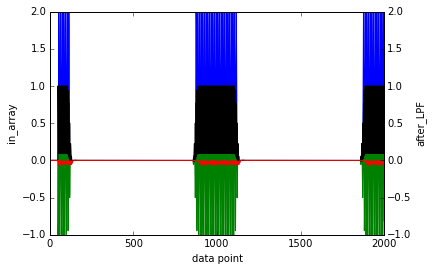

In [6]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

#print(temp.shape)
print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

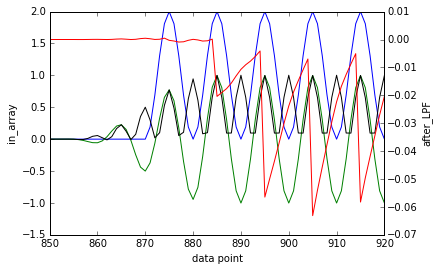

In [9]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
ax.set_xlim(850,920)
position, delta = 63, 2
#ax.axvline(position, color='c')
#ax.axvline(position+delta, color='g');

[['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000']]
(2000, 4)


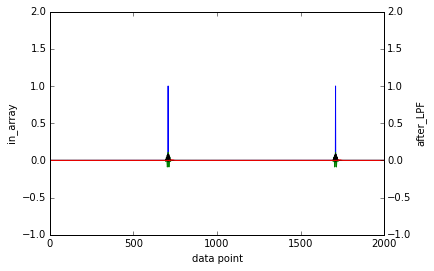

In [22]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

#print(temp.shape)
#print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

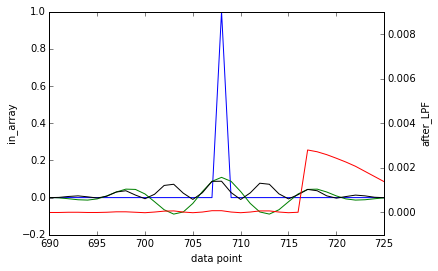

In [25]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
ax.set_xlim(690,725)
position, delta = 63, 2
#ax.axvline(position, color='c')
#ax.axvline(position+delta, color='g');

In [4]:
def determine_xlimits(array_to_search, length):
    initial = 0
    for i in range(len(array_to_search)):
        if array_to_search[i] > 0.95:
            initial = i - length/2
            break
    final = i + length/2
    return initial, final

In [ ]:
xlimits = determine_xlimits(values4[:,0],100)

print(xlimits)
print(*xlimits)
print(*determine_xlimits(values4[:,0],100))

# Current state after moving everything out of ISR & into loop

(2000, 4)


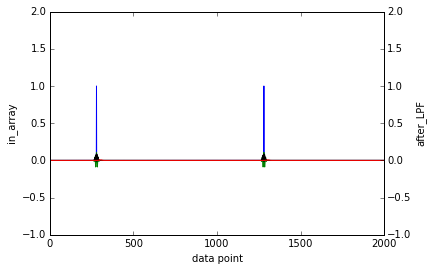

In [26]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

#print(temp.shape)
#print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

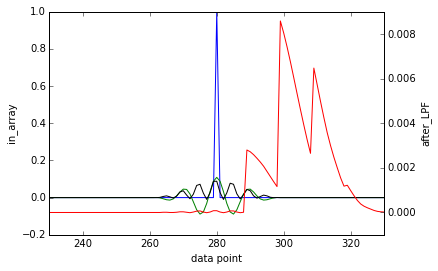

In [36]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
ax.set_xlim(determine_xlimits(values4[:,0],100))
#position, delta = 63, 2
#ax.axvline(position, color='c')
#ax.axvline(position+delta, color='g');

# Low pass filter impulse

(2000, 4)


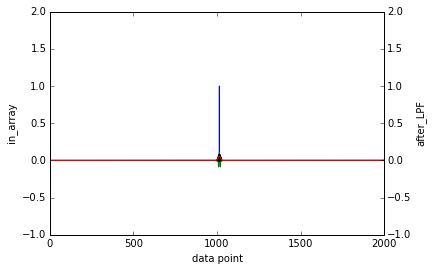

In [39]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

#print(temp.shape)
#print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

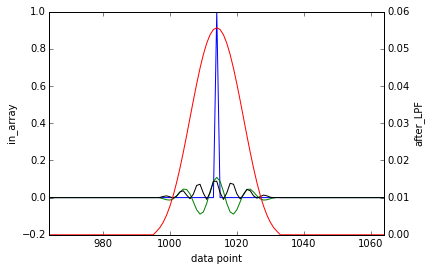

In [40]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
ax.set_xlim(determine_xlimits(values4[:,0],100))
#position, delta = 63, 2
#ax.axvline(position, color='c')
#ax.axvline(position+delta, color='g');

1014.0


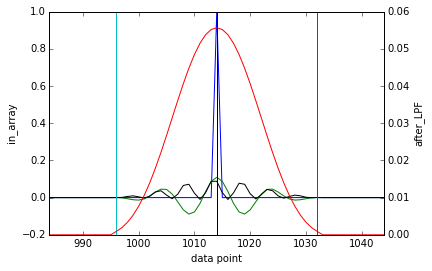

In [56]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,0],60)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter)
ax.axvline(xcenter, color='k')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c')
ax.axvline(position+delta, color='g');
#ax.set_xlim(1030, 1036)
#ax.set_xlim(990, 1000)



In [55]:
print(1014-18)

996


(2000, 4)


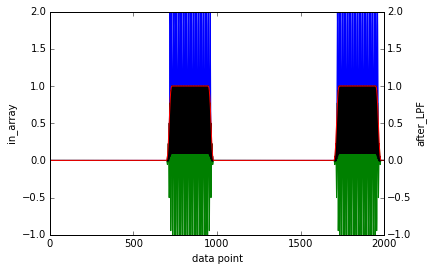

In [96]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

#print(temp.shape)
#print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

717.0


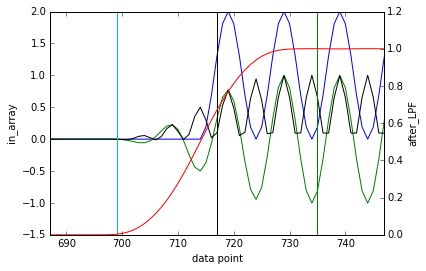

In [97]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,0],60)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter)
ax.axvline(xcenter, color='k')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c')
ax.axvline(position+delta, color='g');

# jj = (counter-n_mid_coef) % LENGTH_OF_DAC;

(2000, 4)


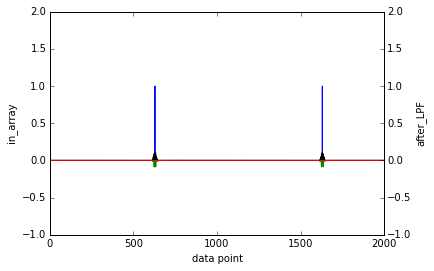

In [9]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )
teensy.close()

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

629.0


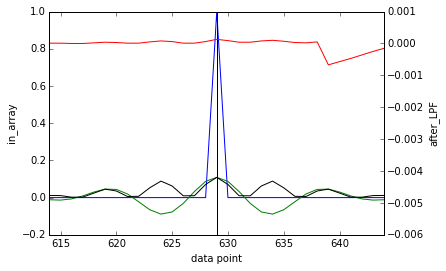

In [10]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,0],30)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter)
ax.axvline(xcenter, color='k')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c')
ax.axvline(position+delta, color='g');

# jj = counter % LENGTH_OF_DAC;

(2000, 4)


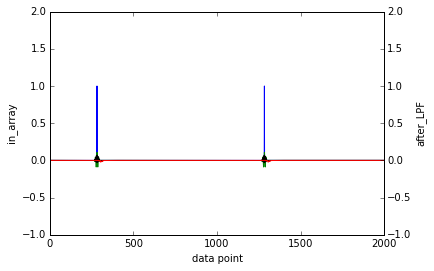

In [5]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )
teensy.close()

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

283.0


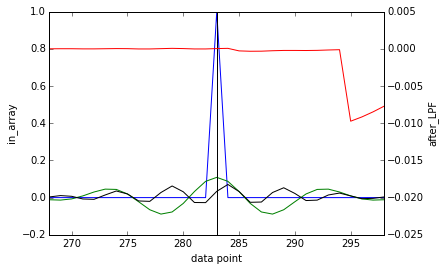

In [6]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,0],30)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter)
ax.axvline(xcenter, color='k')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c')
ax.axvline(position+delta, color='g');

# Summary of problem

In looking at the python code, which works, it appears that doing a zero-phase filter twice (first band pass and then low pass) causes an indexing problem.

##Possible paths forward

- Get rid of zero-phase and just do linear phase
- Figure out how to do two consecutive zero-phase filters separated by a cosine multiplication similar to the python code, but with small circular buffers
- Look at code examples from ... and figure out what they are doing

# Get rid of zero-phase implementation andjust do linear phase filters

## jj = (counter-n_mid_coef) % LENGTH_OF_DAC;

(2000, 4)


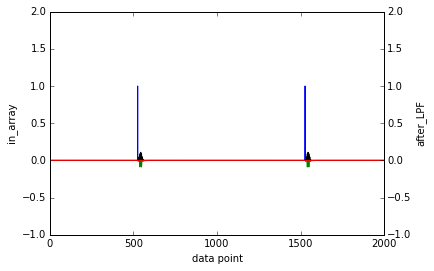

In [11]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )
teensy.close()

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

526.0


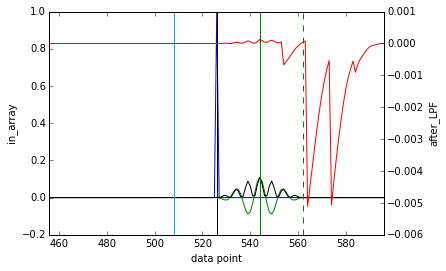

In [21]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,0],140)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter)
ax.axvline(xcenter, color='k')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c')
ax.axvline(position+delta, color='g')
ax.axvline(xcenter+delta, color='g', linestyle='--');

## low pass filter in_array

(2000, 4)


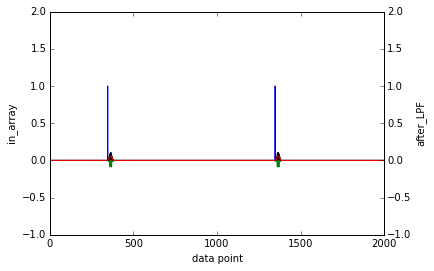

In [22]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )
teensy.close()

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

347.0


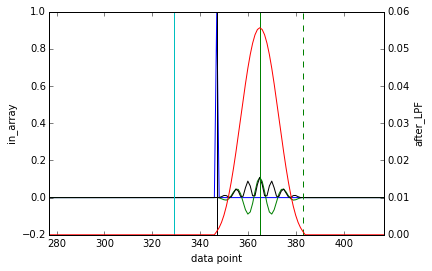

In [23]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,0],140)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter)
ax.axvline(xcenter, color='k')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c')
ax.axvline(position+delta, color='g')
ax.axvline(xcenter+delta, color='g', linestyle='--');

## low pass filter after_BPF

(2000, 4)


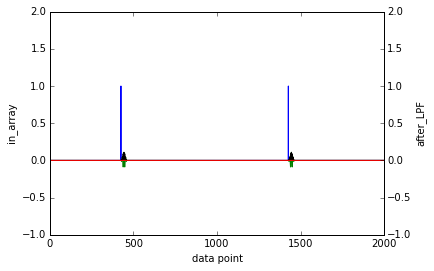

In [24]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )
teensy.close()

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

426.0


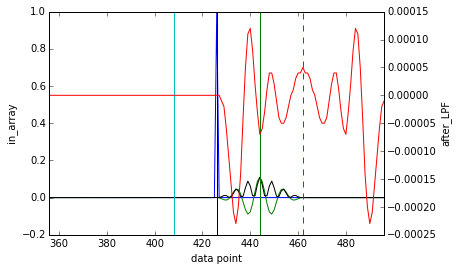

In [25]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,0],140)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter)
ax.axvline(xcenter, color='k')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c')
ax.axvline(position+delta, color='g')
ax.axvline(xcenter+delta, color='g', linestyle='--');

## Change ii for loop to decrease array indices instead of increase them in the cosine multiplication

In [ ]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )
teensy.close()

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

1034.5 0 2069.0


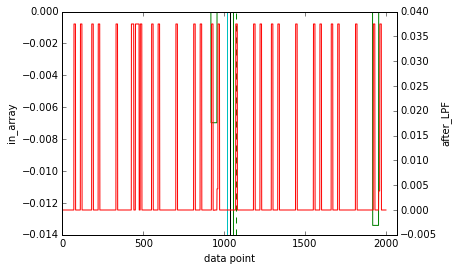

In [31]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
x_min, x_max = determine_xlimits(values4[:,0],140)
ax.set_xlim(x_min, x_max)
#ax.set_xlim(x_min+20, x_max-20)
xcenter = (x_max + x_min)/2
print(xcenter, x_min, x_max)
ax.axvline(xcenter, color='k')
position, delta = xcenter - 18, 36
ax.axvline(position, color='c')
ax.axvline(position+delta, color='g')
ax.axvline(xcenter+delta, color='g', linestyle='--');

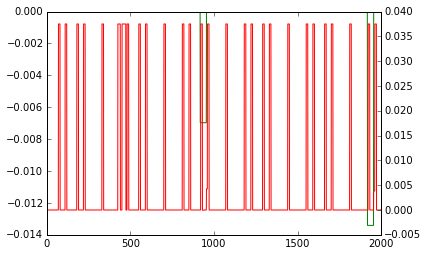

In [30]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_xlim(1060, 1200);

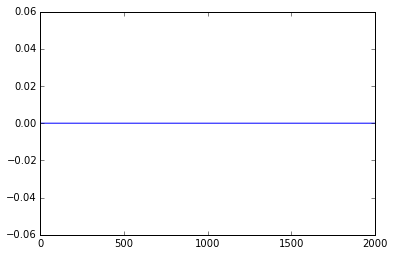

In [32]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])